# Vroča Slovenija

### Branje podatkov

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

podatki = pd.read_csv('podatki/weather_data_filtered.csv')
podatki['utc_timestamp'] = pd.to_datetime(podatki['utc_timestamp'])

#format: utc_timestamp,AT_temperature,BE_temperature,BG_temperature,CH_temperature,CZ_temperature,DE_temperature,DK_temperature,EE_temperature,ES_temperature,FI_temperature,FR_temperature,GB_temperature,GR_temperature,HR_temperature,HU_temperature,IE_temperature,IT_temperature,LT_temperature,LU_temperature,LV_temperature,NL_temperature,NO_temperature,PL_temperature,PT_temperature,RO_temperature,SE_temperature,SI_temperature,SK_temperature
#timestamp format: 1980-01-01T00:00:00Z
# podatki so zajeti vsako uro

#Izpišemo par
podatki.head()

,utc_timestamp,AT_temperature,BE_temperature,BG_temperature,CH_temperature,CZ_temperature,DE_temperature,DK_temperature,EE_temperature,ES_temperature,...,LU_temperature,LV_temperature,NL_temperature,NO_temperature,PL_temperature,PT_temperature,RO_temperature,SE_temperature,SI_temperature,SK_temperature
0,1980-01-01 00:00:00+00:00,-3.640,-0.720,4.664,-6.287,-3.422,-1.261,-1.870,-7.060,8.066,...,-5.150,-7.166,2.382,-7.038,-3.721,12.862,-0.031,-3.945,-3.055,-4.648
1,1980-01-01 01:00:00+00:00,-3.803,-1.165,4.052,-6.602,-3.360,-1.414,-1.914,-7.341,7.960,...,-5.333,-7.371,2.236,-6.941,-3.806,12.757,0.311,-4.053,-3.272,-4.554
2,1980-01-01 02:00:00+00:00,-3.969,-1.434,3.581,-6.981,-3.429,-1.571,-1.976,-7.591,8.008,...,-5.167,-7.342,2.086,-6.856,-3.868,12.674,0.568,-4.129,-3.639,-4.455
3,1980-01-01 03:00:00+00:00,-4.076,-1.843,3.197,-7.368,-3.697,-1.760,-2.040,-7.716,8.065,...,-5.105,-7.206,1.861,-6.761,-3.934,12.622,0.610,-4.139,-4.202,-4.421
4,1980-01-01 04:00:00+00:00,-4.248,-2.094,2.750,-7.849,-4.081,-1.995,-2.106,-7.638,8.009,...,-5.218,-7.073,1.713,-6.569,-4.064,12.522,0.462,-4.239,-4.732,-4.449


### Temperature v Sloveniji od leta 1980 do 2020

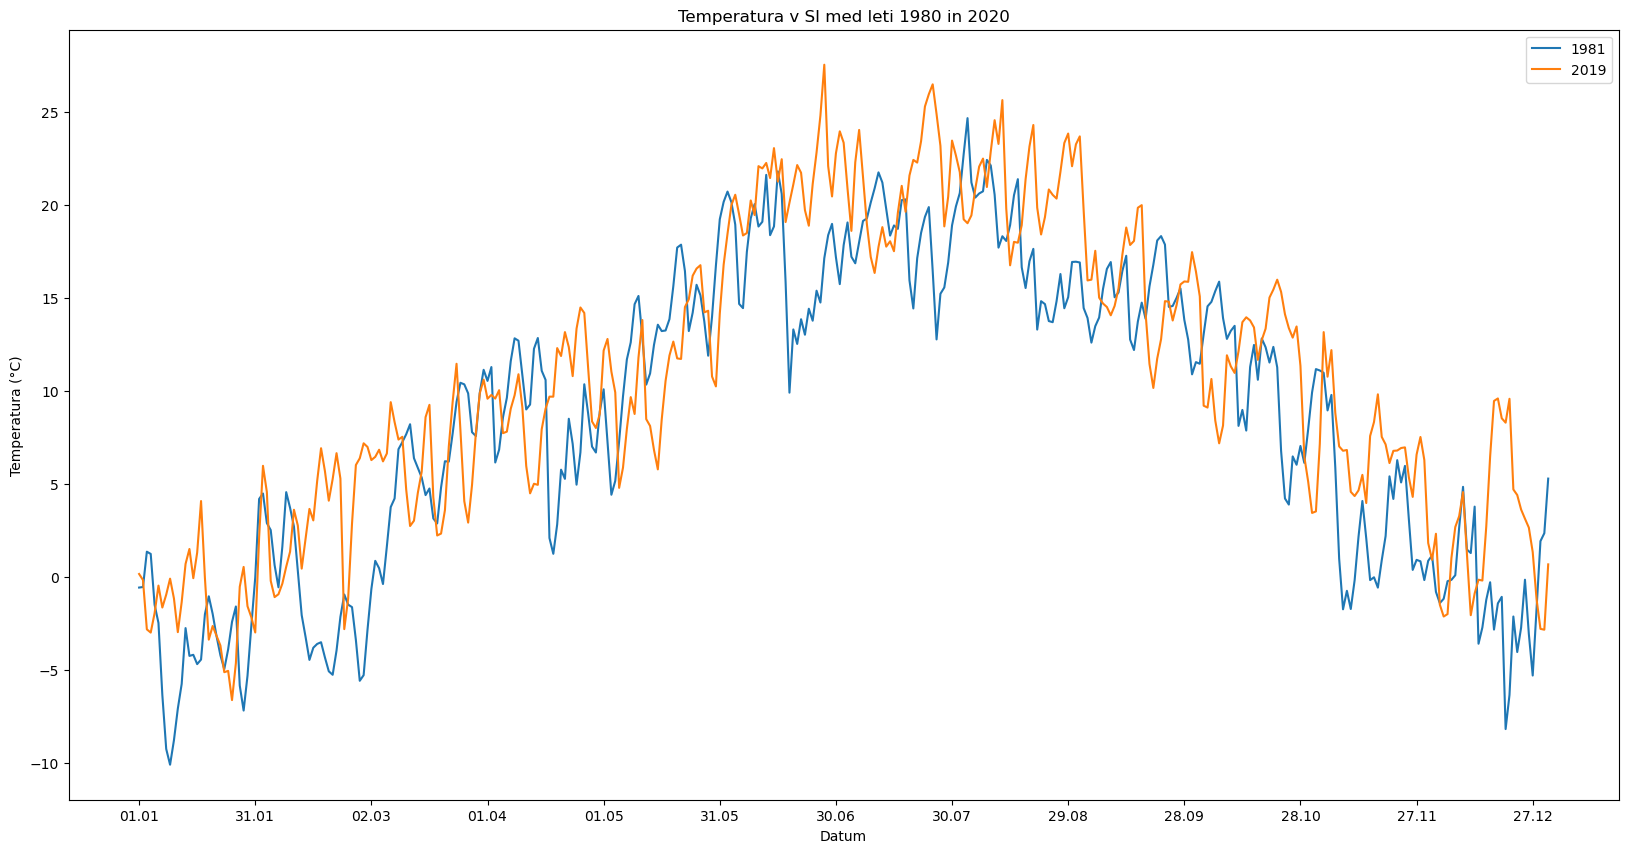

In [29]:
povprecje = podatki.groupby(podatki['utc_timestamp'].dt.date).mean(numeric_only=True)
povprecje.reset_index(inplace=True)
povprecje['utc_timestamp'] = pd.to_datetime(povprecje['utc_timestamp'])
povprecje['year'] = povprecje['utc_timestamp'].dt.year

# temperature
def temperatureVsehLet(country_acronym):
    temperatures = {}
    for year in range(1980, 2021): 
        temperatures[year] = []
        for month in range(1, 13):
            month_temps = povprecje[(povprecje['year'] == year) & (povprecje['utc_timestamp'].dt.month == month)][f'{country_acronym}_temperature'].values
            if len(month_temps) > 0: 
                temperatures[year].append(month_temps)
    return temperatures


# average temperature for each month
def averageTemperatureAll(country_acronym):
    average_temperatures = {}
    temperatures = temperatureVsehLet(country_acronym)
    for year in temperatures:
        average_temperatures[year] = [np.mean(month_temps) for month_temps in temperatures[year]]
    return average_temperatures


def temperatureOfAllYears(country_acronym):
    povprecje_1981 = povprecje[povprecje['year'] == 1981]
    povprecje_2019 = povprecje[povprecje['year'] == 2019]

    formatted_dates = np.array([dt.strftime('%d.%m') for dt in povprecje_1981['utc_timestamp']])

    plt.figure(figsize=(20, 10))
    plt.plot(formatted_dates, povprecje_1981[f'{country_acronym}_temperature'], label='1981')
    plt.plot(formatted_dates, povprecje_2019[f'{country_acronym}_temperature'], label='2019')

    plt.xticks(np.arange(0, len(formatted_dates), 30), formatted_dates[::30])

    plt.xlabel('Datum')
    plt.ylabel('Temperatura (°C)')
    plt.title(f'Temperatura v {country_acronym.upper()} med leti 1980 in 2020')
    plt.legend()
    plt.show()

temperatureOfAllYears('SI')

Mnenje:
V Sloveniji se temperature povečujejo. 
Na grafu opazimo, da je v Sloveniji leta 1981 bila temperatura dokaj majhna v primerjavi z letom 2019. 

### Prikaz hladnih mescev v letih 1980 do 2020

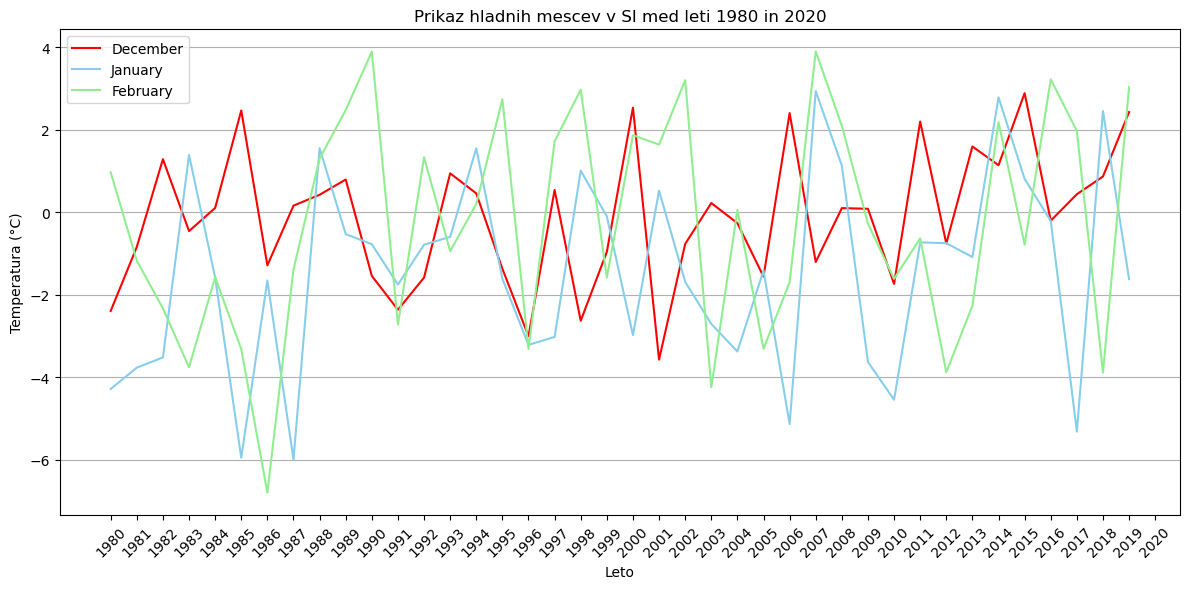

In [30]:
def coldMonths(country_acronym):
    average_temperatures = averageTemperatureAll(country_acronym)
    years = range(1980, 2021)
    january_temperatures = [average_temperatures[year][0] if len(average_temperatures[year]) > 0 else np.nan for year in years]
    december_temperatures = [average_temperatures[year][-1] if len(average_temperatures[year]) > 0 else np.nan for year in years]
    february_temperatures = [average_temperatures[year][1] if len(average_temperatures[year]) > 0 else np.nan for year in years]

    plt.figure(figsize=(12, 6))
    plt.plot(years, december_temperatures, label='December', color="red")
    plt.plot(years, january_temperatures, label='January', color="skyblue")
    plt.plot(years, february_temperatures, label='February', color="lightgreen")

    plt.xlabel('Leto')
    plt.ylabel('Temperatura (°C)')
    plt.title(f"Prikaz hladnih mescev v {country_acronym.upper()} med leti 1980 in 2020")
    plt.xticks(years, rotation=45)
    plt.grid(axis="y")
    plt.legend()
    plt.tight_layout()
    plt.show()

coldMonths('SI')

### Prikaz povprečne temperature za vsak mesec in letnih časov v letih 1980 do 2020

In [31]:
def seasonTemperatures(country_acronym):
    average_temperatures = averageTemperatureAll(country_acronym)
    season_months = {
        'Spring': [3, 4, 5],    # March, April, May
        'Summer': [6, 7, 8],    # June, July, August
        'Autumn': [9, 10, 11],  # September, October, November
        'Winter': [12, 1, 2]    # December, January, February
    }

    # calculate average temperature per month
    per_month_temperatures = []
    years = range(1980, 2020)
    for month in range(0, 12):
        temperaturesMonth = [average_temperatures[year][month] if len(average_temperatures[year]) > 0 else np.nan for year in years]
        temp = sum(temperaturesMonth) / len(temperaturesMonth)
        per_month_temperatures.append(temp)

    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    print(f"Povprečna temperatura za vsak mesec v letih 1980-2020 ({country_acronym}):")
    for temp, month in zip(per_month_temperatures, months):
        print(f'{month}: {temp:.2f} °C')

    # calculate average temperature for each season
    average_season_temperatures = {}
    for season, months in season_months.items():
        season_temperatures = []
        for month in months:
            season_temperatures.extend([average_temperatures[year][month - 1] for year in years if len(average_temperatures[year]) > 0])
        average_season_temperatures[season] = np.mean(season_temperatures)

    print(f"\nPovprečna temperatura za vsak letni čas v letih 1980-2020 ({country_acronym}):")
    for season, temp in average_season_temperatures.items():
        print(f'{season}: {temp:.2f} °C')

seasonTemperatures('SI')

Povprečna temperatura za vsak mesec v letih 1980-2020 (SI):
January: -1.46 °C
February: -0.27 °C
March: 4.03 °C
April: 8.69 °C
May: 13.66 °C
June: 17.60 °C
July: 20.01 °C
August: 19.79 °C
September: 15.02 °C
October: 9.85 °C
November: 4.19 °C
December: -0.11 °C

Povprečna temperatura za vsak letni čas v letih 1980-2020 (SI):
Spring: 8.79 °C
Summer: 19.13 °C
Autumn: 9.69 °C
Winter: -0.61 °C


Mnenje: vidimo, da povprečno nahladnejši mesec v letih 1980 do 2020 je januar, najtoplejši pa julij.
Po letnih časih pa je najtoplejši poletje, najhladnejši pa zima. Razlika med njima je približno 20 stopinj.

### Najtoplejši in najhladnejši dan med letoma 1980 in 2020

In [32]:
def findColdHotDay(country_acronym):
    min_temp = 1000
    min_temp_day = ''
    max_temp = -1000
    max_temp_day = ''

    for index, row in povprecje.iterrows():
        if row[f'{country_acronym}_temperature'] < min_temp:
            min_temp = row[f'{country_acronym}_temperature']
            min_temp_day = row['utc_timestamp'].strftime('%d.%m.%Y')
        if row[f'{country_acronym}_temperature'] > max_temp:
            max_temp = row[f'{country_acronym}_temperature']
            max_temp_day = row['utc_timestamp'].strftime('%d.%m.%Y')

    print(f"\nNajhladnejši dan v {country_acronym.upper()} od leta 1980 do 2020 je bil {min_temp_day} s temperaturo {min_temp:.2f} °C")
    print(f"\nNajbolj vroč dan v {country_acronym.upper()} od leta 1980 do 2020 je bil {max_temp_day} s temperaturo {max_temp:.2f} °C")

findColdHotDay('SI')


Najhladnejši dan v SI od leta 1980 do 2020 je bil 07.01.1985 s temperaturo -15.26 °C

Najbolj vroč dan v SI od leta 1980 do 2020 je bil 04.08.2017 s temperaturo 28.77 °C


### Razlika povprečnih stopinj med letoma 1980 in 2020 v Sloveniji

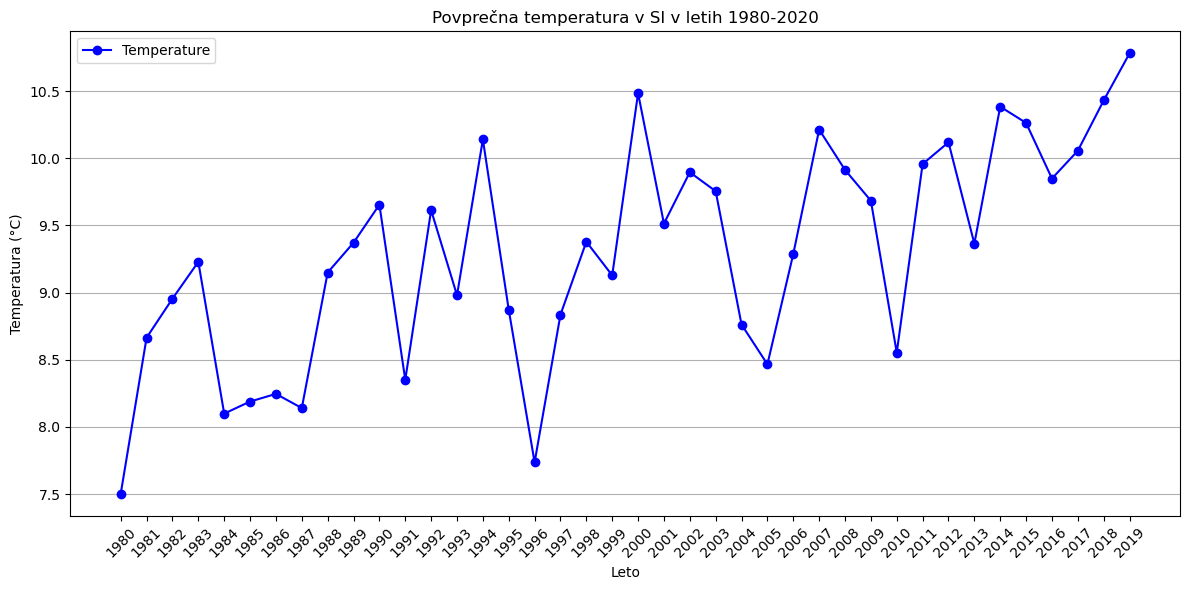

In [33]:
def seznamLet(country_acronym):
    seznam_let = []
    years = range(1980, 2020)
    for i in years:
        povp = povprecje[povprecje['year'] == i][f'{country_acronym}_temperature'].mean()
        seznam_let.append(povp)
    return seznam_let

def averageTemp(country_acronym):
    seznam_let = seznamLet(country_acronym)
    years = range(1980, 2020)

    plt.figure(figsize=(12, 6))
    plt.plot(years, seznam_let, color='blue', marker='o')
    plt.xlabel('Leto')
    plt.ylabel('Temperatura (°C)')
    plt.title(f'Povprečna temperatura v {country_acronym.upper()} v letih 1980-2020')
    plt.xticks(years, rotation=45)
    plt.grid(axis='y')
    plt.legend(['Temperature'])
    plt.tight_layout()
    plt.show()

averageTemp('SI')

In [34]:
def razlikePovp(country_acronym, izpisi):
    seznam_let = seznamLet(country_acronym)
    razlike = {}
    years = range(1980, 2020)
    for i in range(0, len(seznam_let)-1):
        razlika = seznam_let[i+1] - seznam_let[i]
        razlike[f'{years[i]}-{years[i+1]}'] = razlika

    # sortiranje
    razlike = dict(sorted(razlike.items(), key=lambda item: item[1], reverse=True))

    # izpisi razlike
    if izpisi:
        print("\nRazlike v povprečni temperaturi med leti 1980-2020:")
        for leto, razlika in razlike.items():
            print(f'{leto}: {razlika:.2f} °C')
    else:
        return razlike

razlikePovp('SI', True)


Razlike v povprečni temperaturi med leti 1980-2020:
2010-2011: 1.40 °C
1999-2000: 1.36 °C
1991-1992: 1.26 °C
1980-1981: 1.16 °C
1993-1994: 1.16 °C
1996-1997: 1.10 °C
2013-2014: 1.02 °C
1987-1988: 1.01 °C
2006-2007: 0.93 °C
2005-2006: 0.82 °C
1997-1998: 0.54 °C
2001-2002: 0.38 °C
2017-2018: 0.37 °C
2018-2019: 0.35 °C
1981-1982: 0.29 °C
1989-1990: 0.28 °C
1982-1983: 0.27 °C
1988-1989: 0.22 °C
2016-2017: 0.21 °C
2011-2012: 0.16 °C
1984-1985: 0.09 °C
1985-1986: 0.06 °C
1986-1987: -0.11 °C
2014-2015: -0.12 °C
2002-2003: -0.14 °C
2008-2009: -0.23 °C
1998-1999: -0.25 °C
2004-2005: -0.30 °C
2007-2008: -0.30 °C
2015-2016: -0.41 °C
1992-1993: -0.63 °C
2012-2013: -0.76 °C
2000-2001: -0.97 °C
2003-2004: -0.99 °C
1983-1984: -1.13 °C
2009-2010: -1.13 °C
1995-1996: -1.14 °C
1994-1995: -1.27 °C
1990-1991: -1.30 °C


In [35]:
def najvecjaRazlika(country_acronym):
    razlike = razlikePovp(country_acronym, False)

    #first element
    first = list(razlike.keys())[0]
    first_value = razlike[first]
    last = list(razlike.keys())[-1]
    last_value = razlike[first]

    if abs(first_value) < abs(last_value):
        first_value = last_value
        first = last
    print(f"Največja razlika v povprečni temperaturi v {(country_acronym)} je bila med leti {first} z {first_value:.2f} °C")

najvecjaRazlika('SI')

Največja razlika v povprečni temperaturi v SI je bila med leti 2010-2011 z 1.40 °C


Mnenje: Opazimo, da se temperature počasi povečujejo. Zmeraj gre malo dol, nato pa še več gor ali pa ne gre toliko dol več. Graf kaže dolgoročni trend povečevanja povprečne temperature v Sloveniji od leta 1980 do 2020, kar je skladno s svetovnimi vzorci globalnega segrevanja. Čeprav obstajajo letna nihanja, je splošna smer navzgor, kar poudarja pomembnost razumevanja in obravnave podnebnih sprememb. 

In [36]:
def averagePer10Years(start,end, country_acronym):
    seznam1 = []
    years = range(start, end)
    for i in years:
        povp = povprecje[povprecje['year'] == i][f'{(country_acronym)}_temperature'].mean()
        seznam1.append(povp)
    return seznam1

def averageOfDecade(country_acronym, izpisi):
    avg1980_1990 = np.mean(averagePer10Years(1980,1990, country_acronym)) / 10
    avg1990_2000 = np.mean(averagePer10Years(1990,2000, country_acronym)) / 10
    avg2000_2010 = np.mean(averagePer10Years(2000,2010, country_acronym)) / 10
    avg2010_2020 = np.mean(averagePer10Years(2010,2020, country_acronym)) / 10


    seznam_10let = [avg1980_1990, avg1990_2000, avg2000_2010, avg2010_2020]
    seznam_10let = [round(num, 2) for num in seznam_10let]

    if izpisi:
        print(f"\nPovprečna temperatura v {(country_acronym)} v desetletjih:")
        print(f'1980-1990: {seznam_10let[0]} °C')
        print(f'1990-2000: {seznam_10let[1]} °C')
        print(f'2000-2010: {seznam_10let[2]} °C')
        print(f'2010-2020: {seznam_10let[3]} °C')
    else:
        return seznam_10let

    

averageOfDecade('SI', True)


Povprečna temperatura v SI v desetletjih:
1980-1990: 0.86 °C
1990-2000: 0.91 °C
2000-2010: 0.96 °C
2010-2020: 1.0 °C


In [37]:
def warmNextDecade(country_acronym):
    seznam_10let = averageOfDecade(country_acronym, False)
    povprecje_vsa_leta = sum(seznam_10let) / len(seznam_10let)

    print(f"\nLahko pričakujemo, da se bo {(country_acronym)} v naslednjem desetletju ogrela za {povprecje_vsa_leta:.2f} °C.")

warmNextDecade('SI')


Lahko pričakujemo, da se bo SI v naslednjem desetletju ogrela za 0.93 °C.


### Sosednje države

#### Avstrija

C:\Users\timpr\AppData\Local\Temp\ipykernel_18544\2247918820.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  povprecje = podatki.groupby(podatki['utc_timestamp'].dt.date).mean()


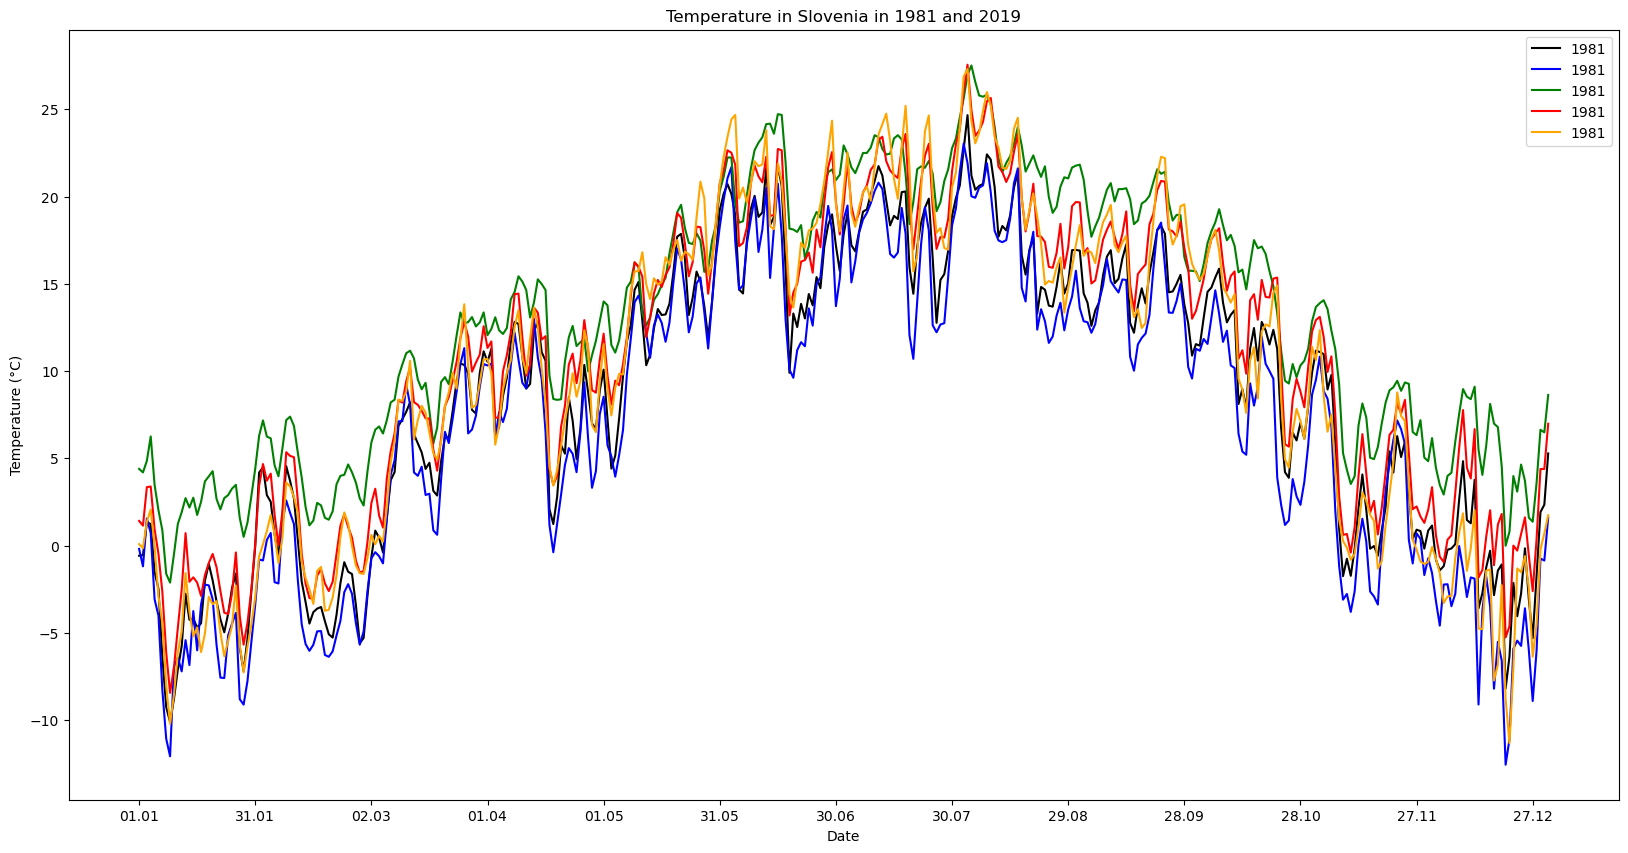

In [38]:
povprecje = podatki.groupby(podatki['utc_timestamp'].dt.date).mean()

povprecje.reset_index(inplace=True)

povprecje['utc_timestamp'] = pd.to_datetime(povprecje['utc_timestamp'])

povprecje['year'] = povprecje['utc_timestamp'].dt.year
povprecje_1981 = povprecje[povprecje['year'] == 1981]
povprecje_2019 = povprecje[povprecje['year'] == 2019]

formatted_dates = np.array([dt.strftime('%d.%m') for dt in povprecje_1981['utc_timestamp']])

plt.figure(figsize=(20, 10))
plt.plot(formatted_dates, povprecje_1981['SI_temperature'], label='1981', color='black')
plt.plot(formatted_dates, povprecje_1981['AT_temperature'], label='1981' , color='blue')
plt.plot(formatted_dates, povprecje_1981['IT_temperature'], label='1981' , color='green')
plt.plot(formatted_dates, povprecje_1981['HR_temperature'], label='1981', color='red')
plt.plot(formatted_dates, povprecje_1981['HU_temperature'], label='1981', color='orange')
plt.xticks(np.arange(0, len(formatted_dates), 30), formatted_dates[::30])

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Slovenia in 1981 and 2019')
plt.legend()
plt.show()

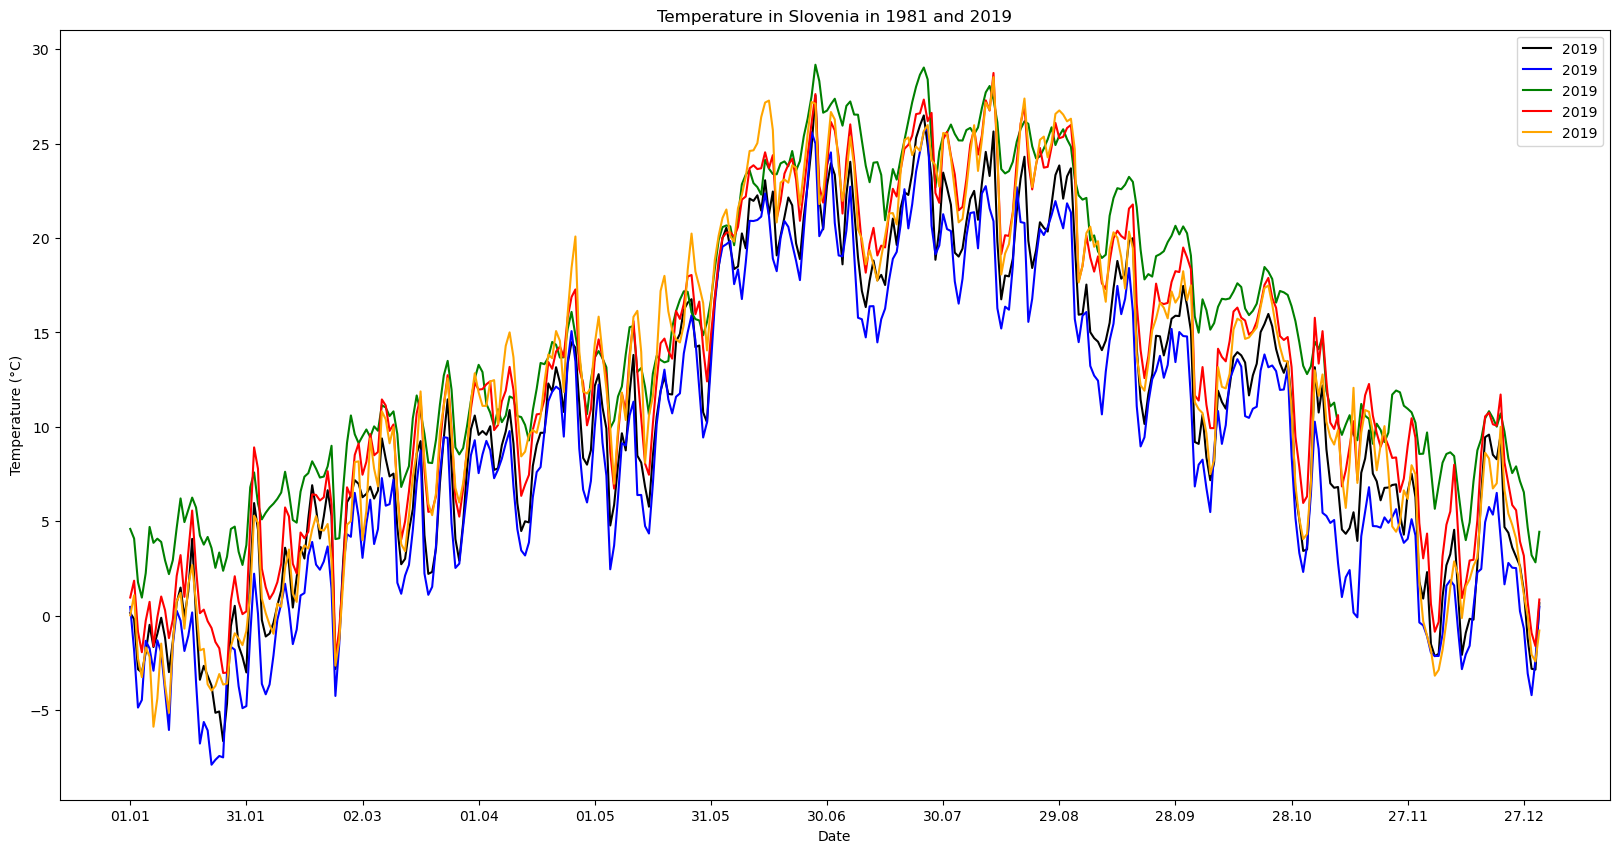

In [39]:
plt.figure(figsize=(20, 10))
plt.plot(formatted_dates, povprecje_2019['SI_temperature'], label='2019', color='black')
plt.plot(formatted_dates, povprecje_2019['AT_temperature'], label='2019', color = 'blue')
plt.plot(formatted_dates, povprecje_2019['IT_temperature'], label='2019', color = 'green')
plt.plot(formatted_dates, povprecje_2019['HR_temperature'], label='2019', color = 'red')
plt.plot(formatted_dates, povprecje_2019['HU_temperature'], label='2019' , color = 'orange')
# set the x-axis to be in months, not years, show 12 months only
plt.xticks(np.arange(0, len(formatted_dates), 30), formatted_dates[::30])

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Slovenia in 1981 and 2019')
plt.legend()
plt.show()

#### Analiza dve skupno

In [40]:
def seasonTemperaturesArray(country_acronym):
    average_temperatures = averageTemperatureAll(country_acronym)
    season_months = {
        'Spring': [3, 4, 5],    # March, April, May
        'Summer': [6, 7, 8],    # June, July, August
        'Autumn': [9, 10, 11],  # September, October, November
        'Winter': [12, 1, 2]    # December, January, February
    }
    array1 = np.zeros((16), dtype=object)
    # calculate average temperature per month
    per_month_temperatures = []
    years = range(1980, 2020)
    for month in range(0, 12):
        temperaturesMonth = [average_temperatures[year][month] if len(average_temperatures[year]) > 0 else np.nan for year in years]
        temp = sum(temperaturesMonth) / len(temperaturesMonth)
        per_month_temperatures.append(temp)

    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    #print(f"Povprečna temperatura za vsak mesec v letih 1980-2020 ({country_acronym}):")
    i = 0
    for temp, month in zip(per_month_temperatures, months):
        #print(f'{month}: {temp:.2f} °C')
        array1[i] = f'{temp:.2f} °C'
        i=i+1

    # calculate average temperature for each season
    average_season_temperatures = {}
    for season, months in season_months.items():
        season_temperatures = []
        for month in months:
            season_temperatures.extend([average_temperatures[year][month - 1] for year in years if len(average_temperatures[year]) > 0])
        average_season_temperatures[season] = np.mean(season_temperatures)

    #print(f"\nPovprečna temperatura za vsak letni čas v letih 1980-2020 ({country_acronym}):")
    for season, temp in average_season_temperatures.items():
        #print(f'{season}: {temp:.2f} °C')
        array1[i] = f'{temp:.2f} °C'
        i=i+1
    return array1

In [41]:
season_months = {
    'Spring': [3, 4, 5],    # March, April, May
    'Summer': [6, 7, 8],    # June, July, August
    'Autumn': [9, 10, 11],  # September, October, November
    'Winter': [12, 1, 2]    # December, January, February
}

mesci = ['Januar', 'Februar', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
drzave = ['Slovenija', 'Avstrija', 'Italija', 'Hrvaška', 'Madžarska']
table = np.zeros((6, 17), dtype=object)
table[0][0] = 'Država'
table[1][0] = "Slovenija"
table[2][0] = 'Avstrija'
table[3][0] = 'Italija'
table[4][0] = 'Hrvaška'
table[5][0] = 'Madžarska'
table[0][13] = 'Winter'
table[0][14] = 'Spring'
table[0][15] = 'Summer'
table[0][16] = 'Autumn'


for i in range (0, 12):
    table[0][i+1] = mesci[i]
i=1
for t in seasonTemperaturesArray("SI"):
    table[1][i] = t
    i = i+1
i=1
for t in seasonTemperaturesArray("AT"):
    table[2][i] = t
    i = i+1
i=1
for t in seasonTemperaturesArray("IT"):
    table[3][i] = t
    i = i+1
i=1
for t in seasonTemperaturesArray("HR"):
    table[4][i] = t
    i = i+1
i=1
for t in seasonTemperaturesArray("HU"):
    table[5][i] = t
    i = i+1
df = pd.DataFrame(table)
print("Povprečne temperature v državah za vsak mesec in letni čas:")
df

Povprečne temperature v državah za vsak mesec in letni čas:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Država,Januar,Februar,March,April,May,June,July,August,September,October,November,December,Winter,Spring,Summer,Autumn
1,Slovenija,-1.46 °C,-0.27 °C,4.03 °C,8.69 °C,13.66 °C,17.60 °C,20.01 °C,19.79 °C,15.02 °C,9.85 °C,4.19 °C,-0.11 °C,8.79 °C,19.13 °C,9.69 °C,-0.61 °C
2,Avstrija,-3.03 °C,-1.78 °C,2.49 °C,7.34 °C,12.47 °C,16.19 °C,18.37 °C,18.07 °C,13.46 °C,8.36 °C,2.47 °C,-1.67 °C,7.43 °C,17.55 °C,8.10 °C,-2.16 °C
3,Italija,4.71 °C,5.40 °C,8.54 °C,11.88 °C,16.42 °C,20.87 °C,23.95 °C,23.98 °C,19.67 °C,14.99 °C,9.68 °C,5.84 °C,12.28 °C,22.93 °C,14.78 °C,5.32 °C
4,Hrvaška,0.38 °C,1.70 °C,5.89 °C,10.60 °C,15.57 °C,19.64 °C,22.36 °C,22.28 °C,17.29 °C,11.98 °C,6.17 °C,1.75 °C,10.69 °C,21.43 °C,11.81 °C,1.28 °C
5,Madžarska,-2.20 °C,-0.17 °C,4.85 °C,10.72 °C,16.13 °C,20.01 °C,22.42 °C,22.14 °C,16.82 °C,10.80 °C,4.26 °C,-0.76 °C,10.57 °C,21.52 °C,10.62 °C,-1.04 °C


#### Madžarska

#### Hrvaška 

#### Italija

#### Analiza 3

In [42]:
findColdHotDay('SI')


Najhladnejši dan v SI od leta 1980 do 2020 je bil 07.01.1985 s temperaturo -15.26 °C

Najbolj vroč dan v SI od leta 1980 do 2020 je bil 04.08.2017 s temperaturo 28.77 °C


In [43]:
findColdHotDay('AT')


Najhladnejši dan v AT od leta 1980 do 2020 je bil 12.01.1987 s temperaturo -19.91 °C

Najbolj vroč dan v AT od leta 1980 do 2020 je bil 03.08.2013 s temperaturo 26.29 °C


In [44]:
findColdHotDay('IT')


Najhladnejši dan v IT od leta 1980 do 2020 je bil 10.01.1985 s temperaturo -4.62 °C

Najbolj vroč dan v IT od leta 1980 do 2020 je bil 04.08.2017 s temperaturo 30.70 °C


In [45]:
findColdHotDay('HR')


Najhladnejši dan v HR od leta 1980 do 2020 je bil 31.01.1987 s temperaturo -13.02 °C

Najbolj vroč dan v HR od leta 1980 do 2020 je bil 04.08.2017 s temperaturo 30.91 °C


In [46]:
findColdHotDay('HU')


Najhladnejši dan v HU od leta 1980 do 2020 je bil 13.01.1987 s temperaturo -19.72 °C

Najbolj vroč dan v HU od leta 1980 do 2020 je bil 20.07.2007 s temperaturo 32.15 °C


##### Zanimivo je, da najtoplejši dan ni nujno, da se zgodi v najtoplejšem letu.

## Analiza 4

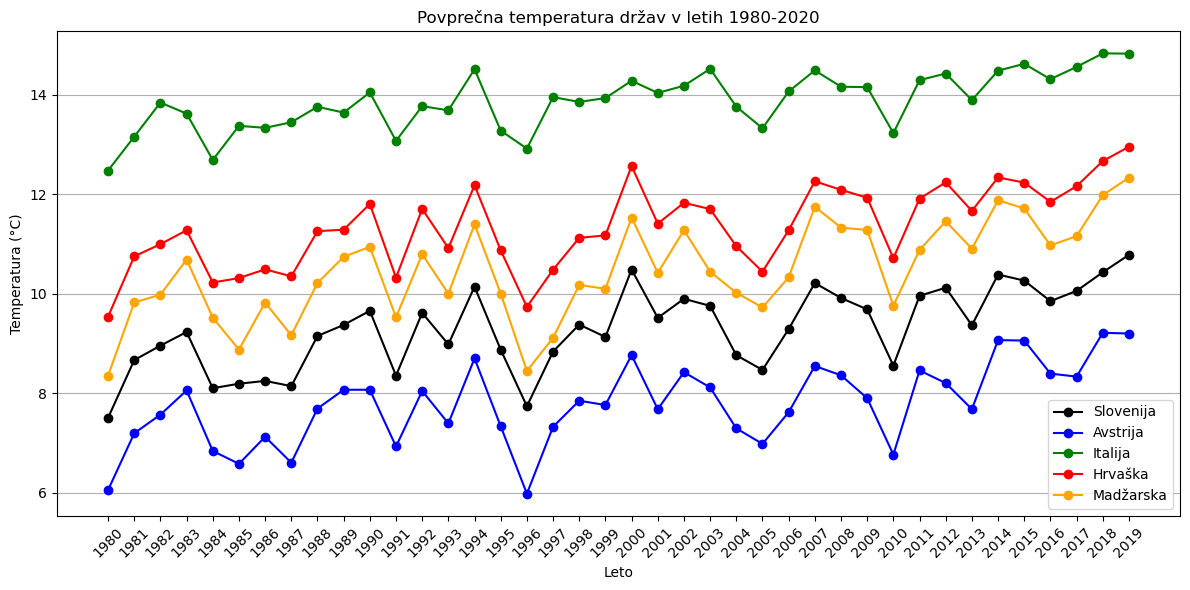

In [47]:

years = range(1980, 2020)
plt.figure(figsize=(12, 6))
plt.plot(years, np.array(seznamLet('SI')), color='black', marker='o')
plt.plot(years, np.array(seznamLet('AT')), color='blue' ,marker='o')
plt.plot(years, np.array(seznamLet('IT')), color='green', marker='o')
plt.plot(years, np.array(seznamLet('HR')), color='red', marker='o')
plt.plot(years, np.array(seznamLet('HU')), color='orange', marker='o')
plt.xlabel('Leto')
plt.ylabel('Temperatura (°C)')
plt.title(f'Povprečna temperatura držav v letih 1980-2020')
plt.xticks(years, rotation=45)
plt.grid(axis='y')
plt.legend(['Slovenija', 'Avstrija', 'Italija', 'Hrvaška', 'Madžarska'])
plt.tight_layout()
plt.show()  


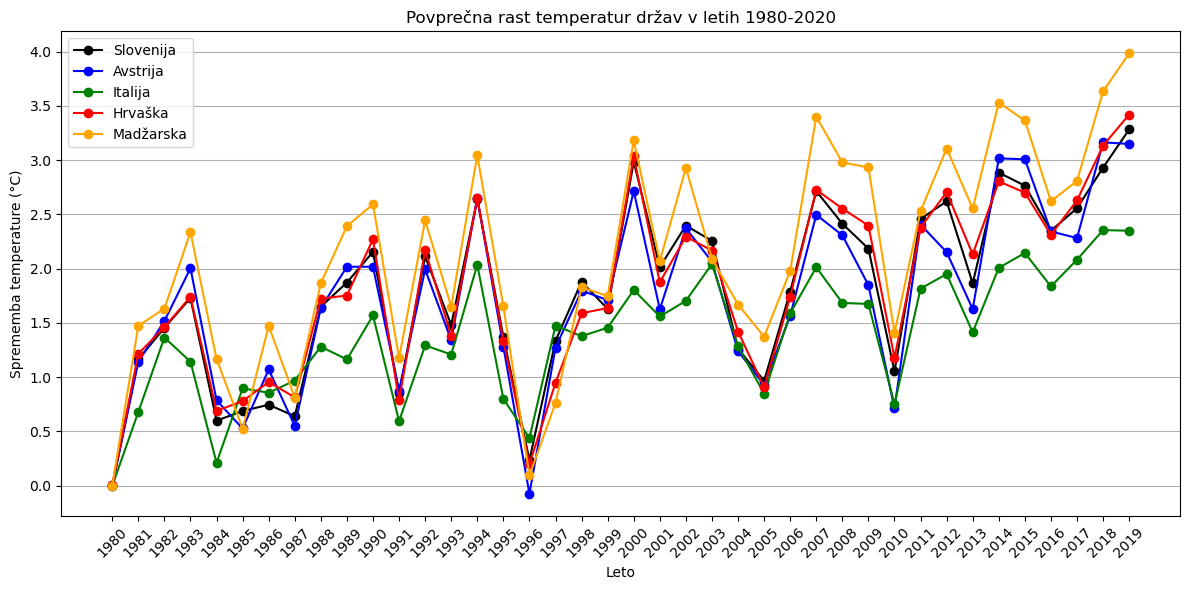

In [48]:
division = -6.05
years = range(1980, 2020)
plt.figure(figsize=(12, 6))
plt.plot(years, np.array(seznamLet('SI'))-1.45 + division, color='black', marker='o')
plt.plot(years, np.array(seznamLet('AT')) + division, color='blue' ,marker='o')
plt.plot(years, np.array(seznamLet('IT'))-6.43 + division, color='green', marker='o')
plt.plot(years, np.array(seznamLet('HR'))-3.485 + division, color='red', marker='o')
plt.plot(years, np.array(seznamLet('HU'))-2.3 + division, color='orange', marker='o')
plt.xlabel('Leto')
plt.ylabel('Sprememba temperature (°C)')
plt.title(f'Povprečna rast temperatur držav v letih 1980-2020')
plt.xticks(years, rotation=45)
plt.grid(axis='y')
plt.legend(['Slovenija', 'Avstrija', 'Italija', 'Hrvaška', 'Madžarska'])
plt.tight_layout()
plt.show()  

In [49]:
najvecjaRazlika("SI")
najvecjaRazlika("AT")
najvecjaRazlika("IT")
najvecjaRazlika("HR")
najvecjaRazlika("HU")

Največja razlika v povprečni temperaturi v SI je bila med leti 2010-2011 z 1.40 °C
Največja razlika v povprečni temperaturi v AT je bila med leti 2010-2011 z 1.69 °C
Največja razlika v povprečni temperaturi v IT je bila med leti 2010-2011 z 1.07 °C
Največja razlika v povprečni temperaturi v HR je bila med leti 1999-2000 z 1.40 °C
Največja razlika v povprečni temperaturi v HU je bila med leti 1980-1981 z 1.47 °C


## Analiza 5

In [50]:
countries = ['SI', 'AT', 'IT', 'HR', 'HU']

table = [["Država", "1980-1990", "1990-2000", "2000-2010", "2010-2020", "Povprečna rast temperature (°C)", "Povprečna sprememba v rasti (°C)"]]

for i, country in enumerate(countries, start=1):
    table.append([country])
    
    decade_avg_temps = averageOfDecade(country, False)
    
    avg_growth = sum(decade_avg_temps) / len(decade_avg_temps)
    avg_growth_deviation = sum(decade_avg_temps[i + 1] - decade_avg_temps[i] for i in range(len(decade_avg_temps) - 1)) / (len(decade_avg_temps) - 1)
    
    table[i].extend(decade_avg_temps)
    table[i].append(avg_growth)
    table[i].append(avg_growth_deviation)

df2 = pd.DataFrame(table)

print("Povprečne spremembe temperatur v državah za vsako desetletje:")
df2

Povprečne spremembe temperatur v državah za vsako desetletje:


,0,1,2,3,4,5,6
0,Država,1980-1990,1990-2000,2000-2010,2010-2020,Povprečna rast temperature (°C),Povprečna sprememba v rasti (°C)
1,SI,0.86,0.91,0.96,1.0,0.9325,0.046667
2,AT,0.72,0.75,0.8,0.84,0.7775,0.04
3,IT,1.33,1.37,1.41,1.44,1.3875,0.036667
4,HR,1.06,1.1,1.16,1.21,1.1325,0.05
5,HU,0.97,1.0,1.08,1.13,1.045,0.053333


In [51]:
drzave = ['Slovenija', 'Avstrija', 'Italija', 'Hrvaška', 'Madžarska']
table1 = np.zeros((6, 7), dtype=object)
table1[0][0] = 'Država'
table1[1][0] = "Slovenija"
table1[2][0] = 'Avstrija'
table1[3][0] = 'Italija'
table1[4][0] = 'Hrvaška'
table1[5][0] = 'Madžarska'
table1[0][1] = '1980'
table1[0][2] = '1989'
table1[0][3] = '1999'
table1[0][4] = '2009'
table1[0][5] = '2019'
table1[0][6] = '2029'

temperature2019SI = np.mean(np.array(averageTemperatureAll('SI')[2019]))
temperature2019AT = np.mean(np.array(averageTemperatureAll('AT')[2019]))
temperature2019IT = np.mean(np.array(averageTemperatureAll('IT')[2019]))
temperature2019HR = np.mean(np.array(averageTemperatureAll('HR')[2019]))
temperature2019HU = np.mean(np.array(averageTemperatureAll('HU')[2019]))

table1[1][1] = np.mean(np.array(averageTemperatureAll('SI')[1980]))
table1[2][1] = np.mean(np.array(averageTemperatureAll('AT')[1980]))
table1[3][1] = np.mean(np.array(averageTemperatureAll('IT')[1980]))
table1[4][1] = np.mean(np.array(averageTemperatureAll('HR')[1980]))
table1[5][1] = np.mean(np.array(averageTemperatureAll('HU')[1980]))

table1[1][2] = np.mean(np.array(averageTemperatureAll('SI')[1989]))
table1[2][2] = np.mean(np.array(averageTemperatureAll('AT')[1989]))
table1[3][2] = np.mean(np.array(averageTemperatureAll('IT')[1989]))
table1[4][2] = np.mean(np.array(averageTemperatureAll('HR')[1989]))
table1[5][2] = np.mean(np.array(averageTemperatureAll('HU')[1989]))

table1[1][3] = np.mean(np.array(averageTemperatureAll('SI')[1999]))
table1[2][3] = np.mean(np.array(averageTemperatureAll('AT')[1999]))
table1[3][3] = np.mean(np.array(averageTemperatureAll('IT')[1999]))
table1[4][3] = np.mean(np.array(averageTemperatureAll('HR')[1999]))
table1[5][3] = np.mean(np.array(averageTemperatureAll('HU')[1999]))

table1[1][4] = np.mean(np.array(averageTemperatureAll('SI')[2009]))
table1[2][4] = np.mean(np.array(averageTemperatureAll('AT')[2009]))
table1[3][4] = np.mean(np.array(averageTemperatureAll('IT')[2009]))
table1[4][4] = np.mean(np.array(averageTemperatureAll('HR')[2009]))
table1[5][4] = np.mean(np.array(averageTemperatureAll('HU')[2009]))

table1[1][5] = np.mean(np.array(averageTemperatureAll('SI')[2019]))
table1[2][5] = np.mean(np.array(averageTemperatureAll('AT')[2019]))
table1[3][5] = np.mean(np.array(averageTemperatureAll('IT')[2019]))
table1[4][5] = np.mean(np.array(averageTemperatureAll('HR')[2019]))
table1[5][5] = np.mean(np.array(averageTemperatureAll('HU')[2019]))

table1[1][6] = temperature2019SI + table[1][5] + table[1][6]
table1[2][6] = temperature2019AT + table[2][5] + table[2][6]
table1[3][6] = temperature2019IT + table[3][5] + table[3][6]
table1[4][6] = temperature2019HR + table[4][5] + table[4][6]
table1[5][6] = temperature2019HU + table[5][5] + table[5][6]

df2 = pd.DataFrame(table1)
print("Povprečne temperature v državah za vsako desetletje:")
df2

Povprečne temperature v državah za vsako desetletje:


,0,1,2,3,4,5,6
0,Država,1980,1989,1999,2009,2019,2029
1,Slovenija,7.48607,9.327585,9.063826,9.634651,10.746982,11.726149
2,Avstrija,6.034937,8.023177,7.693501,7.84575,9.159175,9.976675
3,Italija,12.458764,13.599958,13.876203,14.098356,14.787213,16.21138
4,Hrvaška,9.520125,11.243299,11.110072,11.879812,12.913646,14.096146
5,Madžarska,8.333384,10.696232,10.034307,11.2263,12.289364,13.387697
